In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("../Dataset/dataset.csv")

In [3]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
labels = data['Disease'].value_counts()
labels

Arthritis                                  120
Gastroenteritis                            120
Dimorphic hemmorhoids(piles)               120
Allergy                                    120
Tuberculosis                               120
Varicose veins                             120
Peptic ulcer diseae                        120
Cervical spondylosis                       120
Drug Reaction                              120
GERD                                       120
Chicken pox                                120
Hepatitis E                                120
Hypertension                               120
Hepatitis B                                120
Paralysis (brain hemorrhage)               120
Acne                                       120
Dengue                                     120
Hypoglycemia                               120
Diabetes                                   120
Chronic cholestasis                        120
Hepatitis C                                120
Alcoholic hep

In [5]:
data_sevrity = pd.read_csv('../Dataset/Symptom-severity.csv')
data_sevrity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [6]:
data_dict = data_sevrity.set_index('Symptom').T.to_dict()

In [7]:
def remove_space_between_word(dataset):
    for idx in dataset.index:
        for col in dataset:
            if (type(dataset[col][idx]) == str ):
                dataset[col][idx] = dataset[col][idx].strip()
                dataset[col][idx] = dataset[col][idx].replace(" ", "_")
    return data

In [8]:
data = remove_space_between_word(data)
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal_infection,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal_infection,itching,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal_infection,itching,skin_rash,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
le = LabelEncoder()
def encode_severity(dataset):
    for idx in data_sevrity.index:
        dataset = dataset.replace(data_sevrity["Symptom"][idx] , data_sevrity["weight"][idx])
    dataset = dataset.replace("foul_smell_of_urine" , 5)
    dataset = dataset.replace("dischromic__patches" , 6)
    dataset = dataset.replace("spotting__urination" , 6)
    dataset = dataset.fillna(0)
    dataset['Disease'] = le.fit_transform(dataset['Disease'])
    return dataset

In [10]:
data = encode_severity(data)

In [11]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,1,3,4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,3,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,1,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,1,3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,1,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,20.000000,3.410976,4.165854,4.173171,3.967073,3.195122,2.654878,2.059756,1.712195,1.554878,1.304878,0.979268,0.702439,0.492683,0.323171,0.282927,0.136585,0.029268
std,11.833362,1.316310,1.207541,1.249229,1.855343,2.163883,2.384472,2.340259,2.244483,2.250034,2.061402,1.880334,1.799707,1.529126,1.305543,1.298518,0.719747,0.240191
min,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,7.000000,7.000000,5.000000,2.000000


In [13]:
data.dtypes

Disease         int32
Symptom_1       int64
Symptom_2       int64
Symptom_3       int64
Symptom_4     float64
Symptom_5     float64
Symptom_6     float64
Symptom_7     float64
Symptom_8     float64
Symptom_9     float64
Symptom_10    float64
Symptom_11    float64
Symptom_12    float64
Symptom_13    float64
Symptom_14    float64
Symptom_15    float64
Symptom_16    float64
Symptom_17    float64
dtype: object

In [14]:
labels = data['Disease']
data = data.drop('Disease',axis=1)

In [15]:
labels.value_counts()

39    120
33    120
25    120
21    120
17    120
13    120
9     120
5     120
1     120
40    120
36    120
32    120
28    120
24    120
20    120
16    120
12    120
8     120
4     120
29    120
37    120
35    120
2     120
31    120
27    120
23    120
19    120
15    120
11    120
7     120
3     120
38    120
34    120
30    120
26    120
22    120
18    120
14    120
10    120
6     120
0     120
Name: Disease, dtype: int64

In [16]:
dummy_label = np_utils.to_categorical(labels)

In [17]:
len(dummy_label[0])

41

In [18]:
data.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,1,3,4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xtrain, xtest, ytrain, ytest = train_test_split(data, dummy_label, test_size=0.2, shuffle=True, random_state=40)

In [20]:
xtrain = xtrain.astype(str).astype(float)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.losses import CategoricalCrossentropy

model = Sequential()
model.add(Dense(8, input_dim=17, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(41, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 144       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_2 (Dense)              (None, 41)                2665      
Total params: 3,385
Trainable params: 3,385
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=xtrain, y=ytrain, epochs=100)

Epoch 1/100
123/123 [==============================] - 2s 1ms/step - loss: 3.2669 - accuracy: 0.1161
Epoch 2/100
123/123 [==============================] - 0s 810us/step - loss: 2.2839 - accuracy: 0.3473
Epoch 3/100
123/123 [==============================] - 0s 817us/step - loss: 1.6689 - accuracy: 0.5770
Epoch 4/100
123/123 [==============================] - 0s 781us/step - loss: 1.3005 - accuracy: 0.6827
Epoch 5/100
123/123 [==============================] - 0s 914us/step - loss: 1.0664 - accuracy: 0.7373
Epoch 6/100
123/123 [==============================] - 0s 833us/step - loss: 0.9121 - accuracy: 0.7670
Epoch 7/100
123/123 [==============================] - 0s 896us/step - loss: 0.7914 - accuracy: 0.8059
Epoch 8/100
123/123 [==============================] - 0s 824us/step - loss: 0.6992 - accuracy: 0.8349
Epoch 9/100
123/123 [==============================] - 0s 802us/step - loss: 0.6365 - accuracy: 0.8374
Epoch 10/100
123/123 [==============================] - 0s 791us/step - los

123/123 [==============================] - 0s 872us/step - loss: 0.0504 - accuracy: 0.9835
Epoch 80/100
123/123 [==============================] - 0s 787us/step - loss: 0.0471 - accuracy: 0.9855
Epoch 81/100
123/123 [==============================] - 0s 763us/step - loss: 0.0440 - accuracy: 0.9888
Epoch 82/100
123/123 [==============================] - 0s 788us/step - loss: 0.0470 - accuracy: 0.9855
Epoch 83/100
123/123 [==============================] - 0s 868us/step - loss: 0.0456 - accuracy: 0.9868
Epoch 84/100
123/123 [==============================] - 0s 851us/step - loss: 0.0460 - accuracy: 0.9853
Epoch 85/100
123/123 [==============================] - 0s 900us/step - loss: 0.0444 - accuracy: 0.9868
Epoch 86/100
123/123 [==============================] - 0s 867us/step - loss: 0.0406 - accuracy: 0.9876
Epoch 87/100
123/123 [==============================] - 0s 905us/step - loss: 0.0407 - accuracy: 0.9876
Epoch 88/100
123/123 [==============================] - 0s 1ms/step - loss: 0

In [24]:
model.predict(xtest)

array([[0.00000000e+00, 0.00000000e+00, 1.19367424e-38, ...,
        0.00000000e+00, 1.23500224e-19, 9.99664426e-01],
       [7.93421865e-01, 2.26573371e-27, 7.13710623e-17, ...,
        6.49571078e-31, 6.39853255e-08, 7.75352371e-32],
       [1.27568248e-10, 5.42172198e-28, 0.00000000e+00, ...,
        0.00000000e+00, 1.05103135e-08, 5.06415623e-28],
       ...,
       [1.56287572e-32, 0.00000000e+00, 2.54686808e-35, ...,
        0.00000000e+00, 3.25071740e-12, 2.21662119e-10],
       [1.93430680e-14, 2.67531427e-18, 9.14954612e-10, ...,
        2.62825700e-18, 1.38721985e-11, 4.41349779e-22],
       [3.74335988e-23, 1.30009598e-17, 2.21364880e-05, ...,
        3.66479927e-03, 2.75676384e-28, 1.76292786e-26]], dtype=float32)

Text(0.5, 1.0, 'Accuracy History')

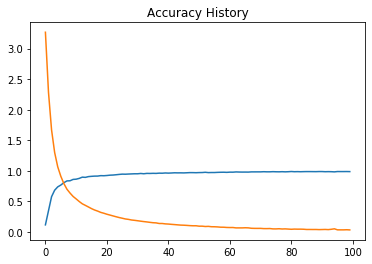

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Accuracy History')


In [36]:
symp = pd.Series(['breathlessness','vomiting','sweating','chest_pain',math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan,math.nan])
symp = encode_severity_test(symp)

In [37]:
pred = model.predict(np.array(symp).reshape(1,-1))

In [38]:
classes = le.classes_
print(classes[np.argmax(pred)])

Hypertension


In [26]:
def encode_severity_test(dataset):
    for idx in data_sevrity.index:
        dataset = dataset.replace(data_sevrity["Symptom"][idx] , data_sevrity["weight"][idx])
    dataset = dataset.replace("foul_smell_of_urine" , 5)
    dataset = dataset.replace("dischromic_patches" , 6)
    dataset = dataset.replace("spotting_urination" , 6)
    dataset = dataset.fillna(0)
    return dataset

In [139]:
symp = encode_severity_test(xtest)

In [141]:
y_pred_prob = model.predict(symp)
y_pred_prob

array([[0.0000000e+00, 0.0000000e+00, 7.3027291e-29, ..., 0.0000000e+00,
        7.0301285e-20, 9.9994731e-01],
       [7.5370923e-02, 1.0695503e-33, 8.9234471e-12, ..., 1.0020054e-25,
        4.7267830e-09, 8.8328062e-37],
       [5.7694993e-16, 1.2332431e-23, 5.0269632e-19, ..., 3.4145515e-22,
        3.7115755e-18, 6.6420856e-27],
       ...,
       [0.0000000e+00, 0.0000000e+00, 8.2722817e-32, ..., 0.0000000e+00,
        1.4482885e-11, 3.6377785e-06],
       [1.6490660e-08, 2.8704828e-24, 1.4781780e-10, ..., 4.3257624e-21,
        1.3602505e-10, 9.3322963e-24],
       [3.1179951e-07, 3.6568133e-09, 1.6516264e-04, ..., 1.4528270e-02,
        4.3537713e-23, 2.2039529e-23]], dtype=float32)

In [170]:
answer = []
for i in y_pred_prob:
    answer.append(np.argmax(i))

In [171]:
y_test = []
for k in ytest:
    y_test.append(np.argmax(k))

<IPython.core.display.Javascript object>

[]

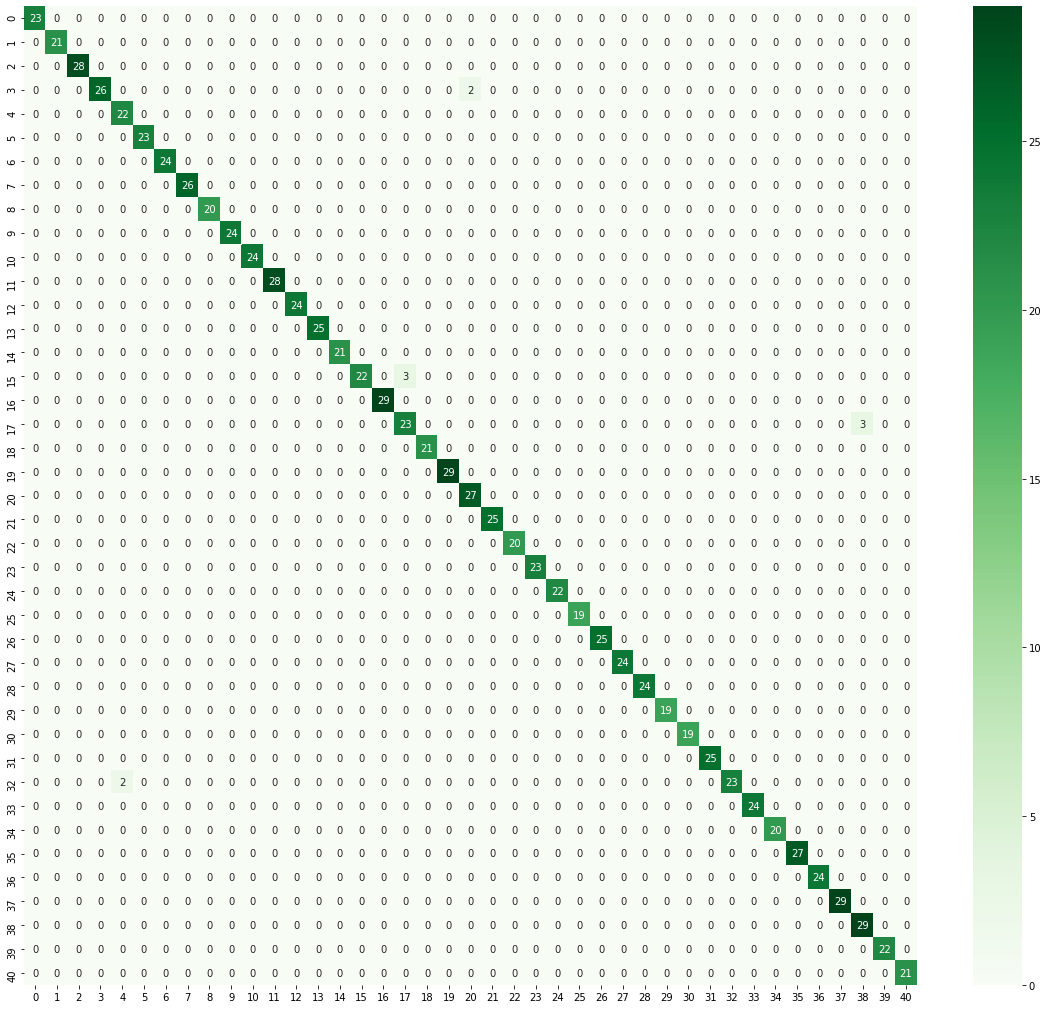

In [164]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,18))
sns.heatmap(confusion_matrix(y_test,answer),cmap='Greens',annot = True)
plt.plot()